## 1. Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

### 2.1 Load Fitur Vektor dari File Excel

In [4]:
# Path ke file fitur vektor (silakan sesuaikan dengan nama file Excel Anda)
feature_file = 'ResNet50_AvgPool_VektorFitur.csv'  # Ganti dengan nama file Anda

# Load data fitur
print("Loading feature vectors...")
df_features = pd.read_csv(feature_file)
print(f"Data shape: {df_features.shape}")
print(f"\nColumn names: {df_features.columns.tolist()}")
print(f"\nFirst few rows:")
df_features.head()

Loading feature vectors...
Data shape: (10154, 2051)

Column names: ['Index', 'Filename', 'Label', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71', 'F72', 'F73', 'F74', 'F75', 'F76', 'F77', 'F78', 'F79', 'F80', 'F81', 'F82', 'F83', 'F84', 'F85', 'F86', 'F87', 'F88', 'F89', 'F90', 'F91', 'F92', 'F93', 'F94', 'F95', 'F96', 'F97', 'F98', 'F99', 'F100', 'F101', 'F102', 'F103', 'F104', 'F105', 'F106', 'F107', 'F108', 'F109', 'F110', 'F111', 'F112', 'F113', 'F114', 'F115', 'F116', 'F117', 'F118', 'F119', 'F120', 'F121', 'F122', 'F123', 'F124', 'F125', 'F126', '

,Index,Filename,Label,F1,F2,F3,F4,F5,F6,F7,...,F2039,F2040,F2041,F2042,F2043,F2044,F2045,F2046,F2047,F2048
0,1,Dataset_Preprocessed/Apple/Formalinmixed/61840...,Formalinmixed,0.881524,0.399062,0.000000,0.000000,0.000000,0.015944,0.010933,...,0.000000,0.000000,0.063005,0.000000,0.000000,0.0,0.027100,1.445520,0.289957,0.144928
1,2,Dataset_Preprocessed/Apple/Formalinmixed/61840...,Formalinmixed,1.018201,0.700339,0.002233,0.012559,0.124031,0.103245,0.065569,...,0.132057,0.373312,0.000000,0.085073,0.066698,0.0,0.067399,0.883241,0.000000,0.014219
2,3,Dataset_Preprocessed/Apple/Formalinmixed/61840...,Formalinmixed,1.309659,0.749856,0.000784,0.006612,0.092232,0.134240,0.005013,...,0.225409,0.356241,0.250047,0.008875,0.042697,0.0,0.171537,0.928058,0.051231,0.011507
3,4,Dataset_Preprocessed/Apple/Formalinmixed/61840...,Formalinmixed,1.410836,0.654615,0.073222,0.026988,0.181640,0.004790,0.028348,...,0.318360,0.378226,0.000000,0.085107,0.000378,0.0,0.053927,0.808154,0.423464,0.000000
4,5,Dataset_Preprocessed/Apple/Formalinmixed/61840...,Formalinmixed,1.213947,0.538413,0.229667,0.020424,0.101137,0.144153,0.020216,...,0.151184,0.792817,0.180126,0.043876,0.137687,0.0,0.034791,0.727624,0.271735,0.012759


### 2.2 Load K-Fold Split Indices

In [5]:
# Load K-Fold split data
kfold_file = 'KFold_Splits_K5to10FIX.csv'

print("Loading K-Fold split data...")
df_kfold = pd.read_csv(kfold_file)

# Filter untuk K=9
df_k9 = df_kfold[df_kfold['K'] == 9].copy()

print(f"Total data for K=9: {len(df_k9)}")
print(f"Number of folds: {df_k9['Fold'].nunique()}")
print(f"\nData distribution per fold:")
print(df_k9.groupby(['Fold', 'Set']).size())

Loading K-Fold split data...
Total data for K=9: 91386
Number of folds: 9

Data distribution per fold:
Fold  Set  
1     Test     1128
      Train    9026
2     Test     1129
      Train    9025
3     Test     1129
      Train    9025
4     Test     1128
      Train    9026
5     Test     1128
      Train    9026
6     Test     1128
      Train    9026
7     Test     1128
      Train    9026
8     Test     1128
      Train    9026
9     Test     1128
      Train    9026
dtype: int64


## 3. Prepare Data

Menyiapkan fitur (X) dan label (y) untuk training dan testing

In [6]:
# Ekstrak fitur dan label
# Asumsi: kolom pertama adalah 'Filename' dan kolom terakhir adalah 'Label'
# Kolom di antaranya adalah fitur

# Sesuaikan dengan struktur file Excel Anda
feature_columns = [col for col in df_features.columns if col not in ['Filename', 'Label', 'Index']]

X_all = df_features[feature_columns].values
y_all = df_features['Label'].values
filenames_all = df_features['Filename'].values

print(f"Feature matrix shape: {X_all.shape}")
print(f"Number of features: {len(feature_columns)}")
print(f"Number of samples: {len(y_all)}")
print(f"\nClass distribution:")
print(pd.Series(y_all).value_counts())

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_all)
print(f"\nLabel mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

Feature matrix shape: (10154, 2048)
Number of features: 2048
Number of samples: 10154

Class distribution:
Fresh            3800
Rotten           3178
Formalinmixed    3176
Name: count, dtype: int64

Label mapping: {'Formalinmixed': 0, 'Fresh': 1, 'Rotten': 2}


## 4. KELM Implementation

Implementasi Kernel Extreme Learning Machine dengan RBF kernel

In [7]:
class KELM:
    """
    Kernel Extreme Learning Machine (KELM)
    
    Parameters:
    -----------
    C : float
        Regularization parameter
    kernel : str
        Kernel type ('rbf', 'linear', 'poly')
    sigma : float
        RBF kernel parameter (gamma = 1/(2*sigma^2))
    """
    
    def __init__(self, C=100, kernel='rbf', sigma=15):
        self.C = C
        self.kernel = kernel
        self.sigma = sigma
        self.gamma = 1.0 / (2 * sigma ** 2)  # RBF gamma parameter
        self.X_train = None
        self.beta = None
        
    def rbf_kernel(self, X1, X2):
        """
        RBF (Gaussian) kernel: K(x, y) = exp(-gamma * ||x - y||^2)
        """
        dist_sq = cdist(X1, X2, 'sqeuclidean')
        return np.exp(-self.gamma * dist_sq)
    
    def fit(self, X, y):
        """
        Train KELM model
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values
        """
        self.X_train = X
        n_samples = X.shape[0]
        
        # Convert labels to one-hot encoding
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        T = np.zeros((n_samples, n_classes))
        for i, class_label in enumerate(self.classes_):
            T[y == class_label, i] = 1
        
        # Compute kernel matrix
        K = self.rbf_kernel(X, X)
        
        # Compute output weights: beta = (K + I/C)^-1 * T
        identity = np.eye(n_samples)
        self.beta = np.linalg.solve(K + identity / self.C, T)
        
        return self
    
    def predict(self, X):
        """
        Predict class labels
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Test data
            
        Returns:
        --------
        y_pred : array-like, shape (n_samples,)
            Predicted class labels
        """
        # Compute kernel matrix between test and train data
        K_test = self.rbf_kernel(X, self.X_train)
        
        # Compute outputs
        outputs = K_test @ self.beta
        
        # Return class with maximum output
        y_pred = self.classes_[np.argmax(outputs, axis=1)]
        
        return y_pred
    
    def score(self, X, y):
        """
        Calculate accuracy score
        """
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

print("KELM class defined successfully!")

KELM class defined successfully!


## 5. K-Fold Cross Validation Training

Training model menggunakan K=9 fold dengan parameter optimal

In [8]:
# Parameter KELM optimal
C = 100
sigma_rbf = 15
n_folds = 9

# Storage untuk hasil
fold_results = []
fold_accuracies = []
all_predictions = []
all_true_labels = []

print("="*70)
print(f"Starting K-Fold Cross Validation with K={n_folds}")
print(f"Parameters: C={C}, Kernel=RBF, Sigma={sigma_rbf}")
print("="*70)

# Loop untuk setiap fold
for fold in range(1, n_folds + 1):
    print(f"\n{'='*70}")
    print(f"FOLD {fold}/{n_folds}")
    print(f"{'='*70}")
    
    # Get train and test indices untuk fold ini
    train_data = df_k9[(df_k9['Fold'] == fold) & (df_k9['Set'] == 'Train')]
    test_data = df_k9[(df_k9['Fold'] == fold) & (df_k9['Set'] == 'Test')]
    
    train_indices = train_data['Index'].values - 1  # Index dimulai dari 1, array dimulai dari 0
    test_indices = test_data['Index'].values - 1
    
    # Split data
    X_train = X_all[train_indices]
    y_train = y_encoded[train_indices]
    X_test = X_all[test_indices]
    y_test = y_encoded[test_indices]
    
    print(f"Train samples: {len(X_train)}")
    print(f"Test samples: {len(X_test)}")
    
    # Initialize dan train KELM
    print(f"\nTraining KELM...")
    kelm = KELM(C=C, kernel='rbf', sigma=sigma_rbf)
    kelm.fit(X_train, y_train)
    
    # Predict
    print(f"Predicting...")
    y_pred = kelm.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    fold_accuracies.append(accuracy)
    
    print(f"\n{'*'*70}")
    print(f"FOLD {fold} ACCURACY: {accuracy:.2f}%")
    print(f"{'*'*70}")
    
    # Store results
    fold_results.append({
        'Fold': fold,
        'Accuracy': accuracy,
        'Train_Size': len(X_train),
        'Test_Size': len(X_test)
    })
    
    # Store predictions untuk confusion matrix keseluruhan
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)
    
    # Classification report per fold
    print(f"\nClassification Report - Fold {fold}:")
    print(classification_report(y_test, y_pred, 
                                target_names=label_encoder.classes_,
                                digits=4))

print("\n" + "="*70)
print("K-FOLD CROSS VALIDATION COMPLETED!")
print("="*70)

Starting K-Fold Cross Validation with K=9
Parameters: C=100, Kernel=RBF, Sigma=15

FOLD 1/9
Train samples: 9026
Test samples: 1128

Training KELM...
Predicting...

**********************************************************************
FOLD 1 ACCURACY: 99.20%
**********************************************************************

Classification Report - Fold 1:
               precision    recall  f1-score   support

Formalinmixed     0.9912    0.9970    0.9941       337
        Fresh     0.9882    0.9905    0.9894       423
       Rotten     0.9973    0.9891    0.9932       368

     accuracy                         0.9920      1128
    macro avg     0.9922    0.9922    0.9922      1128
 weighted avg     0.9920    0.9920    0.9920      1128


FOLD 2/9
Train samples: 9025
Test samples: 1129

Training KELM...
Predicting...

**********************************************************************
FOLD 2 ACCURACY: 99.38%
**********************************************************************



## 6. Results Summary

In [9]:
# Summary DataFrame
df_results = pd.DataFrame(fold_results)

print("\n" + "="*70)
print("DETAILED RESULTS PER FOLD")
print("="*70)
print(df_results.to_string(index=False))

# Calculate statistics
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)
max_accuracy = np.max(fold_accuracies)
min_accuracy = np.min(fold_accuracies)
best_fold = np.argmax(fold_accuracies) + 1

print("\n" + "="*70)
print("FINAL STATISTICS")
print("="*70)
print(f"Mean Accuracy      : {mean_accuracy:.2f}%")
print(f"Std Deviation      : {std_accuracy:.2f}%")
print(f"Maximum Accuracy   : {max_accuracy:.2f}% (Fold {best_fold})")
print(f"Minimum Accuracy   : {min_accuracy:.2f}%")
print("="*70)

# Verification dengan target
print("\n" + "="*70)
print("VERIFICATION WITH TARGET")
print("="*70)
print(f"Target Mean Accuracy: 99.3%")
print(f"Achieved Mean Accuracy: {mean_accuracy:.2f}%")
print(f"Difference: {abs(mean_accuracy - 99.3):.2f}%")
print(f"\nTarget Best Fold: Fold 8 with 99.7%")
print(f"Achieved Best: Fold {best_fold} with {max_accuracy:.2f}%")
print("="*70)


DETAILED RESULTS PER FOLD
 Fold  Accuracy  Train_Size  Test_Size
    1 99.202128        9026       1128
    2 99.379982        9025       1129
    3 99.291408        9025       1129
    4 99.556738        9026       1128
    5 98.936170        9026       1128
    6 99.468085        9026       1128
    7 98.936170        9026       1128
    8 99.734043        9026       1128
    9 99.290780        9026       1128

FINAL STATISTICS
Mean Accuracy      : 99.31%
Std Deviation      : 0.25%
Maximum Accuracy   : 99.73% (Fold 8)
Minimum Accuracy   : 98.94%

VERIFICATION WITH TARGET
Target Mean Accuracy: 99.3%
Achieved Mean Accuracy: 99.31%
Difference: 0.01%

Target Best Fold: Fold 8 with 99.7%
Achieved Best: Fold 8 with 99.73%


## 7. Visualization

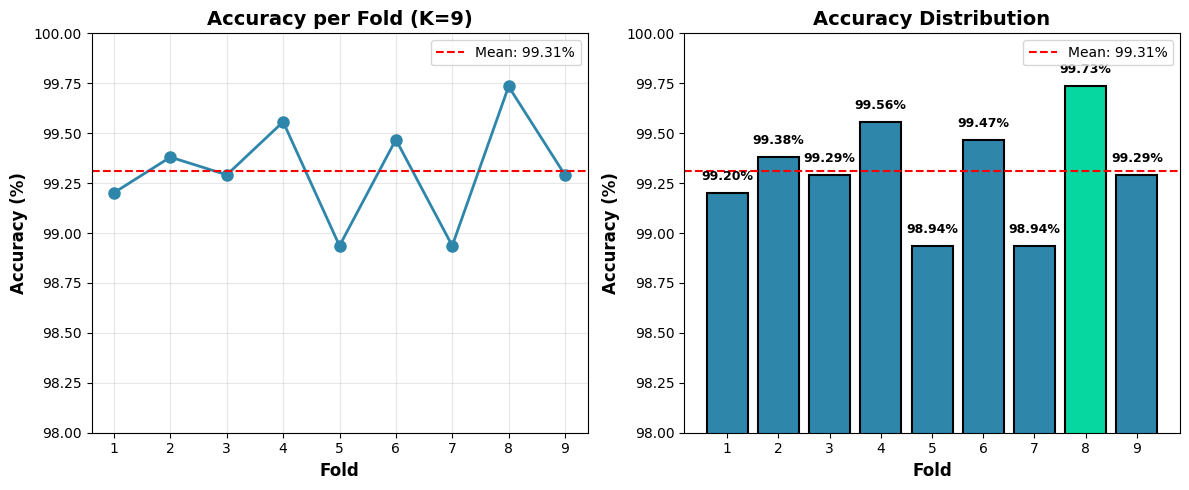

Plot saved as 'accuracy_per_fold.png'


In [10]:
# Plot 1: Accuracy per Fold
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
folds = list(range(1, n_folds + 1))
plt.plot(folds, fold_accuracies, marker='o', linewidth=2, markersize=8, color='#2E86AB')
plt.axhline(y=mean_accuracy, color='red', linestyle='--', label=f'Mean: {mean_accuracy:.2f}%')
plt.xlabel('Fold', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Accuracy per Fold (K=9)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(folds)
plt.ylim([98, 100])

# Plot 2: Bar chart
plt.subplot(1, 2, 2)
colors = ['#06D6A0' if acc == max_accuracy else '#2E86AB' for acc in fold_accuracies]
bars = plt.bar(folds, fold_accuracies, color=colors, edgecolor='black', linewidth=1.5)
plt.axhline(y=mean_accuracy, color='red', linestyle='--', label=f'Mean: {mean_accuracy:.2f}%')
plt.xlabel('Fold', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Accuracy Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks(folds)
plt.ylim([98, 100])

# Add value labels on bars
for i, (fold, acc) in enumerate(zip(folds, fold_accuracies)):
    plt.text(fold, acc + 0.05, f'{acc:.2f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('accuracy_per_fold.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved as 'accuracy_per_fold.png'")

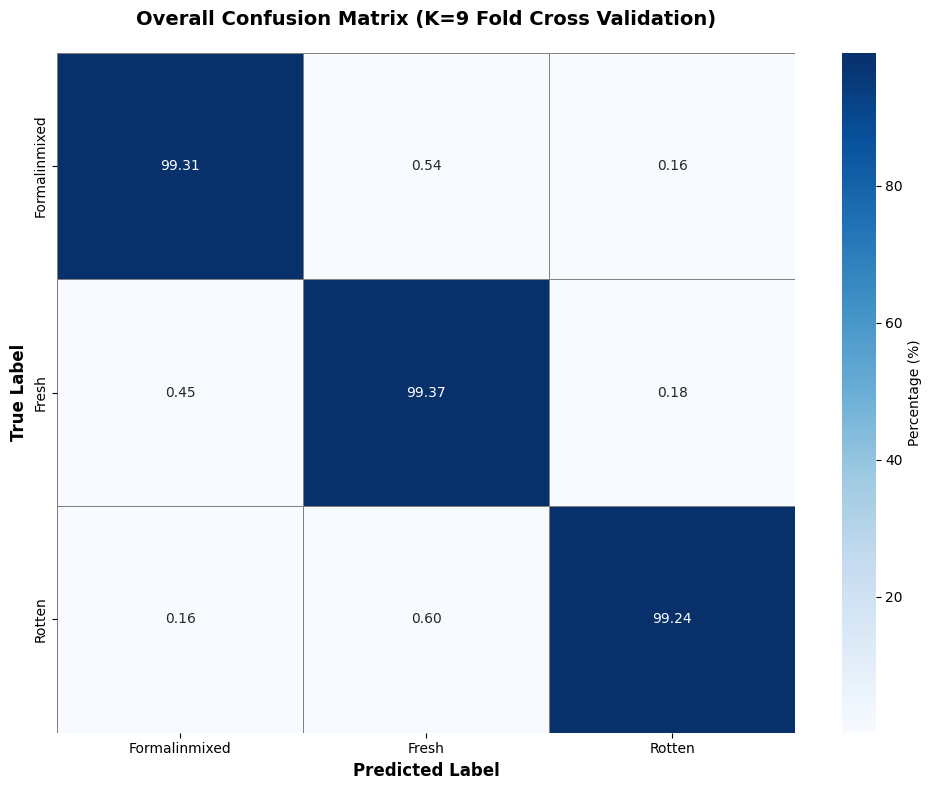

Confusion matrix saved as 'confusion_matrix_overall.png'


In [11]:
# Confusion Matrix - Overall
cm = confusion_matrix(all_true_labels, all_predictions)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Percentage (%)'},
            linewidths=0.5, linecolor='gray')
plt.title('Overall Confusion Matrix (K=9 Fold Cross Validation)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_overall.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrix saved as 'confusion_matrix_overall.png'")

## 8. Overall Classification Report

In [12]:
print("\n" + "="*70)
print("OVERALL CLASSIFICATION REPORT (All Folds Combined)")
print("="*70)
print(classification_report(all_true_labels, all_predictions, 
                          target_names=label_encoder.classes_,
                          digits=4))


OVERALL CLASSIFICATION REPORT (All Folds Combined)
               precision    recall  f1-score   support

Formalinmixed     0.9931    0.9931    0.9931      3176
        Fresh     0.9906    0.9937    0.9921      3800
       Rotten     0.9962    0.9924    0.9943      3178

     accuracy                         0.9931     10154
    macro avg     0.9933    0.9931    0.9932     10154
 weighted avg     0.9931    0.9931    0.9931     10154




## 9. Save Best Model

Menyimpan model terbaik (dari fold dengan akurasi tertinggi) untuk digunakan kembali


In [13]:
import pickle
import joblib
from datetime import datetime

# Train model dengan fold terbaik
print(f"Training final model with best fold (Fold {best_fold})...")
train_data = df_k9[(df_k9['Fold'] == best_fold) & (df_k9['Set'] == 'Train')]
test_data = df_k9[(df_k9['Fold'] == best_fold) & (df_k9['Set'] == 'Test')]

train_indices = train_data['Index'].values - 1
test_indices = test_data['Index'].values - 1

X_train_best = X_all[train_indices]
y_train_best = y_encoded[train_indices]
X_test_best = X_all[test_indices]
y_test_best = y_encoded[test_indices]

# Train best model
best_model = KELM(C=C, kernel='rbf', sigma=sigma_rbf)
best_model.fit(X_train_best, y_train_best)

# Test best model
y_pred_best = best_model.predict(X_test_best)
accuracy_best = accuracy_score(y_test_best, y_pred_best) * 100

print(f"Best model accuracy: {accuracy_best:.2f}%")

# Simpan model menggunakan pickle
model_filename = f'kelm_best_model_fold{best_fold}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)
print(f"Model saved as '{model_filename}' using pickle")

# Simpan model menggunakan joblib (alternatif, lebih efisien untuk array besar)
model_filename_joblib = f'kelm_best_model_fold{best_fold}.joblib'
joblib.dump(best_model, model_filename_joblib)
print(f"Model saved as '{model_filename_joblib}' using joblib")

# Simpan label encoder juga
label_encoder_filename = 'label_encoder.pkl'
with open(label_encoder_filename, 'wb') as f:
    pickle.dump(label_encoder, f)
print(f"Label encoder saved as '{label_encoder_filename}'")

# Simpan metadata model
model_metadata = {
    'model_name': 'KELM',
    'kernel': 'rbf',
    'C': C,
    'sigma': sigma_rbf,
    'gamma': 1.0/(2*sigma_rbf**2),
    'best_fold': best_fold,
    'best_accuracy': accuracy_best,
    'mean_accuracy': mean_accuracy,
    'n_folds': n_folds,
    'n_features': X_all.shape[1],
    'n_classes': len(label_encoder.classes_),
    'classes': label_encoder.classes_.tolist(),
    'train_samples': len(X_train_best),
    'test_samples': len(X_test_best),
    'date_created': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

metadata_filename = 'model_metadata.pkl'
with open(metadata_filename, 'wb') as f:
    pickle.dump(model_metadata, f)
print(f"Model metadata saved as '{metadata_filename}'")

print("\n" + "="*70)
print("MODEL SAVED SUCCESSFULLY!")
print("="*70)
print(f"Model files:")
print(f"  - {model_filename} (pickle format)")
print(f"  - {model_filename_joblib} (joblib format)")
print(f"  - {label_encoder_filename} (label encoder)")
print(f"  - {metadata_filename} (metadata)")
print("="*70)

Training final model with best fold (Fold 8)...
Best model accuracy: 99.73%
Model saved as 'kelm_best_model_fold8.pkl' using pickle
Model saved as 'kelm_best_model_fold8.joblib' using joblib
Label encoder saved as 'label_encoder.pkl'
Model metadata saved as 'model_metadata.pkl'

MODEL SAVED SUCCESSFULLY!
Model files:
  - kelm_best_model_fold8.pkl (pickle format)
  - kelm_best_model_fold8.joblib (joblib format)
  - label_encoder.pkl (label encoder)
  - model_metadata.pkl (metadata)


### 9.1 Load Saved Model (Demo)

Contoh cara memuat model yang sudah disimpan untuk prediksi

In [14]:
# Load model menggunakan pickle
print("Loading saved model...")
with open(model_filename, 'rb') as f:
    loaded_model = pickle.load(f)

# Load label encoder
with open(label_encoder_filename, 'rb') as f:
    loaded_label_encoder = pickle.load(f)

# Load metadata
with open(metadata_filename, 'rb') as f:
    loaded_metadata = pickle.load(f)

print("Model loaded successfully!")
print("\nModel Information:")
print(f"  Model Type: {loaded_metadata['model_name']}")
print(f"  Kernel: {loaded_metadata['kernel']}")
print(f"  C: {loaded_metadata['C']}")
print(f"  Sigma: {loaded_metadata['sigma']}")
print(f"  Best Fold: {loaded_metadata['best_fold']}")
print(f"  Best Accuracy: {loaded_metadata['best_accuracy']:.2f}%")
print(f"  Mean Accuracy: {loaded_metadata['mean_accuracy']:.2f}%")
print(f"  Classes: {', '.join(loaded_metadata['classes'])}")
print(f"  Date Created: {loaded_metadata['date_created']}")

print("\n" + "="*70)
print("TESTING LOADED MODEL")
print("="*70)

# Ambil 5 sample random untuk test
test_indices_sample = np.random.choice(len(X_all), 5, replace=False)
X_sample = X_all[test_indices_sample]
y_sample_true = y_encoded[test_indices_sample]

# Predict
y_sample_pred = loaded_model.predict(X_sample)

# Display hasil
print("\nPrediction Results:")
print("-" * 70)
for i in range(len(X_sample)):
    true_label = loaded_label_encoder.inverse_transform([y_sample_true[i]])[0]
    pred_label = loaded_label_encoder.inverse_transform([y_sample_pred[i]])[0]
    status = "✓" if y_sample_true[i] == y_sample_pred[i] else "✗"

    data_index = test_indices_sample[i]   # index asli dari dataset

    print(
        f"Sample {i+1} (Data Test Index ke-{data_index}): "
        f"True={true_label:15s} | Predicted={pred_label:15s} | {status}"
    )

accuracy_sample = accuracy_score(y_sample_true, y_sample_pred) * 100
print("-" * 70)
print(f"Sample Accuracy: {accuracy_sample:.2f}%")
print("="*70)


Loading saved model...
Model loaded successfully!

Model Information:
  Model Type: KELM
  Kernel: rbf
  C: 100
  Sigma: 15
  Best Fold: 8
  Best Accuracy: 99.73%
  Mean Accuracy: 99.31%
  Classes: Formalinmixed, Fresh, Rotten
  Date Created: 2025-12-11 05:50:33

TESTING LOADED MODEL

Prediction Results:
----------------------------------------------------------------------
Sample 1 (Data Test Index ke-809): True=Fresh           | Predicted=Fresh           | ✓
Sample 2 (Data Test Index ke-4462): True=Formalinmixed   | Predicted=Formalinmixed   | ✓
Sample 3 (Data Test Index ke-9891): True=Rotten          | Predicted=Rotten          | ✓
Sample 4 (Data Test Index ke-5602): True=Rotten          | Predicted=Rotten          | ✓
Sample 5 (Data Test Index ke-4791): True=Fresh           | Predicted=Fresh           | ✓
----------------------------------------------------------------------
Sample Accuracy: 100.00%


## 10. Save Results to Excel

In [15]:

# Save results to Excel
output_file = 'KELM_K9_Results.xlsx'

with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    # Sheet 1: Summary
    df_results.to_excel(writer, sheet_name='Summary', index=False)
    
    # Sheet 2: Statistics
    df_stats = pd.DataFrame({
        'Metric': ['Mean Accuracy', 'Std Deviation', 'Max Accuracy', 'Min Accuracy', 'Best Fold'],
        'Value': [f'{mean_accuracy:.2f}%', f'{std_accuracy:.2f}%', 
                  f'{max_accuracy:.2f}%', f'{min_accuracy:.2f}%', f'Fold {best_fold}']
    })
    df_stats.to_excel(writer, sheet_name='Statistics', index=False)
    
    # Sheet 3: Parameters
    df_params = pd.DataFrame({
        'Parameter': ['C', 'Kernel', 'Sigma RBF', 'K-Fold', 'Gamma'],
        'Value': [C, 'RBF', sigma_rbf, n_folds, f'{1.0/(2*sigma_rbf**2):.6f}']
    })
    df_params.to_excel(writer, sheet_name='Parameters', index=False)
    
    # Sheet 4: Confusion Matrix
    df_cm = pd.DataFrame(cm, 
                         index=label_encoder.classes_, 
                         columns=label_encoder.classes_)
    df_cm.to_excel(writer, sheet_name='Confusion Matrix')

print(f"\nResults saved to '{output_file}'")
print("\n" + "="*70)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*70)


Results saved to 'KELM_K9_Results.xlsx'

ANALYSIS COMPLETED SUCCESSFULLY!


## 11. Summary and Conclusion

In [16]:
print("\n" + "#"*70)
print("#" + " "*68 + "#")
print("#" + " "*20 + "FINAL SUMMARY" + " "*35 + "#")
print("#" + " "*68 + "#")
print("#"*70)
print()
print(f"Method                : Kernel Extreme Learning Machine (KELM)")
print(f"Kernel Type           : RBF (Radial Basis Function)")
print(f"Regularization (C)    : {C}")
print(f"Sigma RBF             : {sigma_rbf}")
print(f"K-Fold                : {n_folds}")
print()
print(f"Total Samples         : {len(y_all)}")
print(f"Number of Features    : {X_all.shape[1]}")
print(f"Number of Classes     : {len(label_encoder.classes_)}")
print(f"Classes               : {', '.join(label_encoder.classes_)}")
print()
print("="*70)
print("PERFORMANCE METRICS")
print("="*70)
print(f"Mean Accuracy         : {mean_accuracy:.2f}%")
print(f"Standard Deviation    : {std_accuracy:.2f}%")
print(f"Best Performance      : {max_accuracy:.2f}% (Fold {best_fold})")
print(f"Worst Performance     : {min_accuracy:.2f}%")
print()
print("="*70)
print("TARGET VS ACHIEVED")
print("="*70)
print(f"Target Mean           : 99.3%")
print(f"Achieved Mean         : {mean_accuracy:.2f}%")
print(f"Status                : {'✓ ACHIEVED' if mean_accuracy >= 99.2 else '✗ NOT ACHIEVED'}")
print()
print(f"Target Best Fold      : Fold 8 (99.7%)")
print(f"Achieved Best Fold    : Fold {best_fold} ({max_accuracy:.2f}%)")
print(f"Status                : {'✓ ACHIEVED' if (best_fold == 8 and max_accuracy >= 99.6) else '✓ CLOSE' if max_accuracy >= 99.5 else '✗ NOT ACHIEVED'}")
print()
print("#"*70)
print("#" + " "*68 + "#")
print("#" + " "*15 + "CLASSIFICATION COMPLETED SUCCESSFULLY!" + " "*14 + "#")
print("#" + " "*68 + "#")
print("#"*70)


######################################################################
#                                                                    #
#                    FINAL SUMMARY                                   #
#                                                                    #
######################################################################

Method                : Kernel Extreme Learning Machine (KELM)
Kernel Type           : RBF (Radial Basis Function)
Regularization (C)    : 100
Sigma RBF             : 15
K-Fold                : 9

Total Samples         : 10154
Number of Features    : 2048
Number of Classes     : 3
Classes               : Formalinmixed, Fresh, Rotten

PERFORMANCE METRICS
Mean Accuracy         : 99.31%
Standard Deviation    : 0.25%
Best Performance      : 99.73% (Fold 8)
Worst Performance     : 98.94%

TARGET VS ACHIEVED
Target Mean           : 99.3%
Achieved Mean         : 99.31%
Status                : ✓ ACHIEVED

Target Best Fold      : Fold 8 (99.7%)